<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Ago_25_26/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Hacer una función para n órdenes de polinomios.
2.Hacer una gráfica de orden vs costo (n vs l)
3.Hacer una gráfica de costo de cross validación contra el orden del polinomio

**Crear una función que ajuste los pesos para un modelo dado como argumento el grado del polinomio ajustado. La función debe devolver el costo total en el conjunto de datos dado como entrenamiento.**

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [35]:
x = data[0]
y = data[1]

In [66]:
def w_func(x,y,n): #mi definición original de la función para w
  t = y
  X = np.array([np.power(x,i) for i in range(n+1)]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_tt = np.matmul(X.T,t)
  w = np.matmul(invX_tX, X_tt)
  return w

**Función de mínimos cuadrados para orden-n y costo de cada orden**

In [63]:
def w_n(x,y,norder): #la definicion vista en clase
  x = np.asarray([x])
  X = np.ones_like(x)
  for n in range(1, norder+1):
    X = np.append(X, x**n,axis = 0)
  X = X.T
  t = y
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_tt = np.matmul(X.T, t)
  w = np.matmul(invX_tX,X_tt)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w,cost

In [49]:
x = data[0]
x_norm = (x-1896)/4

**Gráfica de los datos y los modelos a n órdenes**

0.4584974723780431


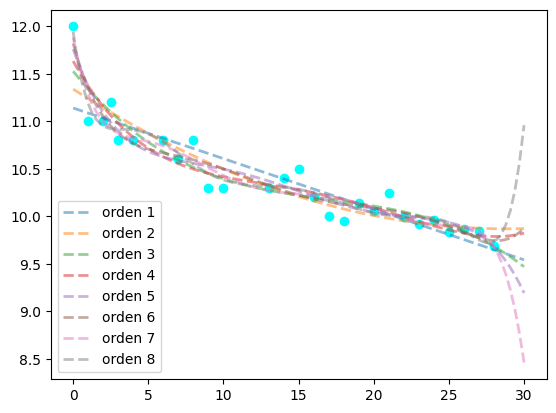

In [75]:
norder = 8
x_test = np.linspace(0,30,100)
plt.scatter(x_norm,y, color = 'cyan')

for n in range(1, norder+1):
  w_test,cost = w_n(x_norm,y,n)
  f_test = 0
  for i in range(len(w_test)):
    f_test += w_test[i]*x_test**i
  plt.plot(x_test, f_test, '--', linewidth = 2, label = f'orden {n}', alpha = 0.5)

plt.legend()

**Gráfica de orden vs costo sin cross validation**

Text(0.5, 1.0, 'Gráfica de orden vs costo')

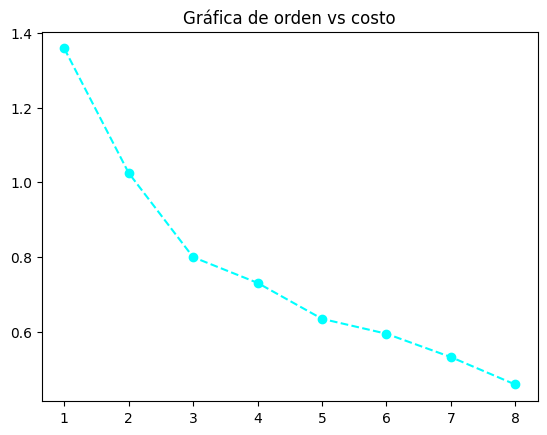

In [142]:
norder = 8
norder_l = [1,2,3,4,5,6,7,8]
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(norder_l, dtype = float)

for n in range(1, norder+1):
  w_test,cost = w_n(x_norm,y,n)
  f_cost[n-1] = cost
plt.plot(norder_l,f_cost, '--o', color = 'cyan')
#plt.xlabel('Orden')
#plt.ylabel('Costo')
plt.title('Gráfica de orden vs costo')

**Cross validation para k=N**

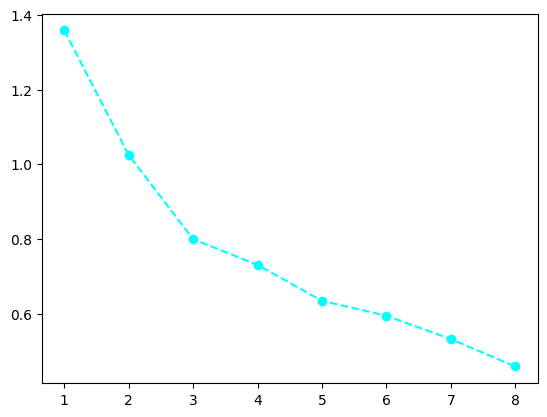

In [175]:
costos = np.zeros(norder)
for i in range(len(x_norm)):
  x_l = np.concatenate((x[0:i],x[i+1:]))
  y_l = np.concatenate((y[0:i],y[i+1:]))
  for n in range(1, norder+1):
    w_test,cost = w_n(x_norm,y,n)
    f_cost[n-1] = cost
    costos[n-1] += f_cost[n-1]
costos_prom = costos/len(x_norm)
costos_prom

plt.plot(norder_l, costos_prom, '--o', color = 'cyan')